In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [14]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [15]:
train_images.shape
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

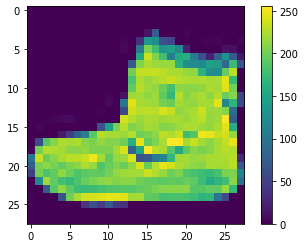

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images/255.0
test_images = test_images/255.0

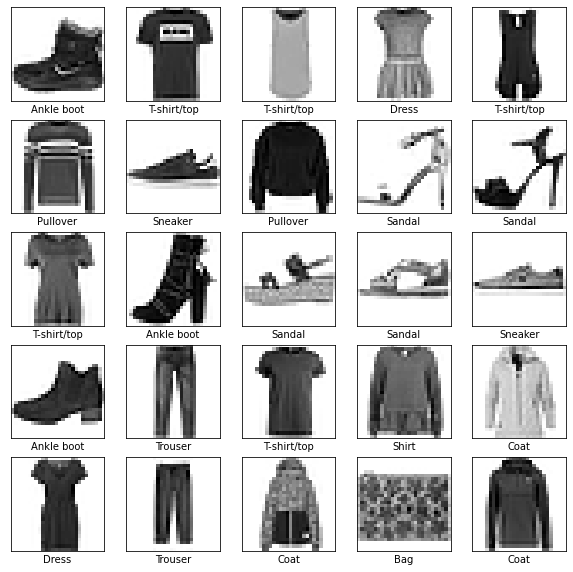

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
#Trenowanie modelu
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5289 - accuracy: 0.8117
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3993 - accuracy: 0.8559
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3704 - accuracy: 0.8657
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3470 - accuracy: 0.8729
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3323 - accuracy: 0.8786
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3202 - accuracy: 0.8822
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3093 - accuracy: 0.8847
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2997 - accuracy: 0.8895
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2913 - accuracy: 0.8927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.283

In [22]:
#ocena dokładności /accuracy/
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"Test dokładności: {test_acc}")

313/313 - 1s - loss: 0.3329 - accuracy: 0.8817 - 688ms/epoch - 2ms/step
Test dokładności: 0.8816999793052673


In [23]:
#prognoza
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [24]:
predictions = probability_model.predict(test_images)

In [25]:
predictions[0]

array([7.4051897e-08, 3.2036762e-10, 1.5206160e-09, 2.4231017e-09,
 4.2903298e-10, 2.1097476e-03, 5.0359321e-09, 1.1162928e-02,
 7.8965936e-09, 9.8672718e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [36]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ),color=color)
            

In [28]:
def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

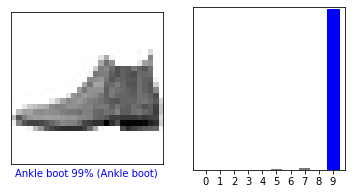

In [29]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

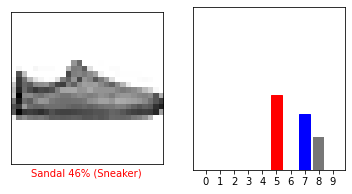

In [30]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

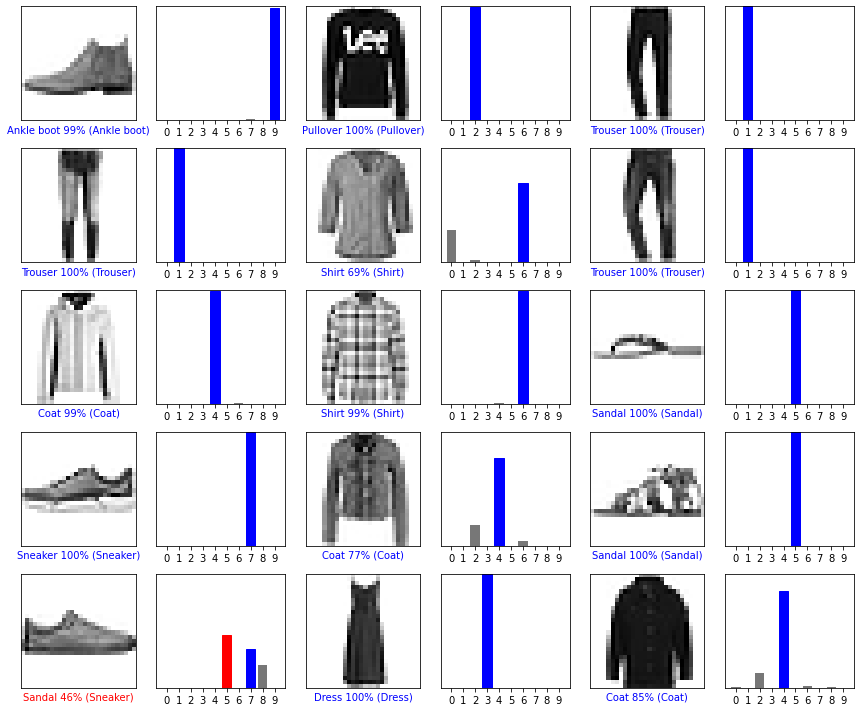

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [32]:
#użycie wyszkolonego modelu
img = test_images[1]
print(img.shape)
img = np.expand_dims(img,0)
print(img.shape)

(28, 28)
(1, 28, 28)


In [33]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[1.0435810e-04 7.0554138e-14 9.9901283e-01 2.0563167e-09 2.1275332e-04
  5.0058304e-12 6.7003124e-04 9.6425672e-20 3.6947273e-10 2.6620888e-15]]


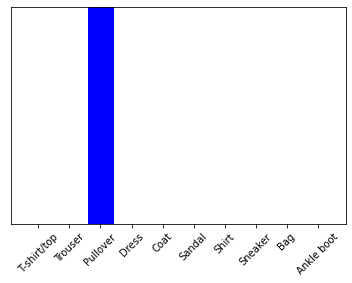

In [34]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [35]:
np.argmax(predictions_single[0])

2